In [14]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [15]:
#Importing the dataset
data_url = 'https://raw.githubusercontent.com/boosuro/profit_estimation_of_companies/master/1000_Companies.csv'
companies = pd.read_csv(data_url)
X = companies.iloc[:,:-1].values
y= companies.iloc[:,4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


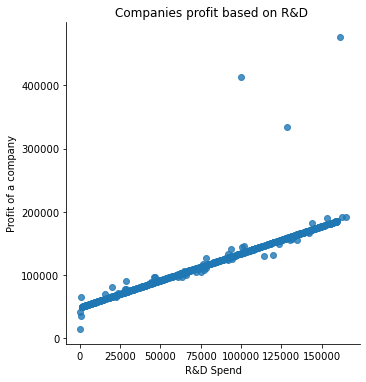

In [16]:
sns.lmplot(data=companies, x='R&D Spend', y='Profit', ci=None, fit_reg=False)

plt.title('Companies profit based on R&D ')
plt.xlabel('R&D Spend')
plt.ylabel('Profit of a company')

plt.show();

<AxesSubplot:>

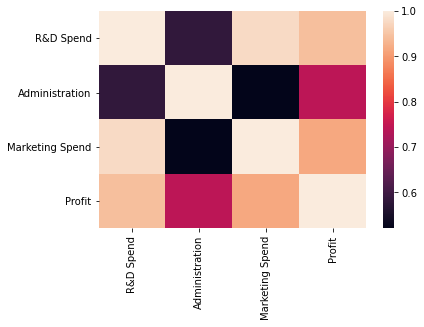

In [17]:
#Data visualization
sns.heatmap(companies.corr())

In [18]:
companies[['R&D Spend','Administration','Marketing Spend']].corr()

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.582434,0.978407
Administration,0.582434,1.000000,0.520465
Marketing Spend,0.978407,0.520465,1.000000


In [19]:
companies.drop(['Marketing Spend'],axis=1,inplace=True)
companies.head()

,R&D Spend,Administration,State,Profit
0,165349.20,136897.80,New York,192261.83
1,162597.70,151377.59,California,191792.06
2,153441.51,101145.55,Florida,191050.39
3,144372.41,118671.85,New York,182901.99
4,142107.34,91391.77,Florida,166187.94


In [20]:
#encoding data 
dummies = pd.get_dummies(companies.State)
companies = pd.concat([companies,dummies],axis=1)
companies.head()

,R&D Spend,Administration,State,Profit,California,Florida,New York
0,165349.20,136897.80,New York,192261.83,0,0,1
1,162597.70,151377.59,California,191792.06,1,0,0
2,153441.51,101145.55,Florida,191050.39,0,1,0
3,144372.41,118671.85,New York,182901.99,0,0,1
4,142107.34,91391.77,Florida,166187.94,0,1,0


In [21]:
companies.drop('State',axis=1,inplace=True)
companies.head()

,R&D Spend,Administration,Profit,California,Florida,New York
0,165349.20,136897.80,192261.83,0,0,1
1,162597.70,151377.59,191792.06,1,0,0
2,153441.51,101145.55,191050.39,0,1,0
3,144372.41,118671.85,182901.99,0,0,1
4,142107.34,91391.77,166187.94,0,1,0


In [22]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
companies[['R&D Spend','Administration']]=scale.fit_transform(companies[['R&D Spend','Administration']])


In [23]:
y=companies.iloc[:,2].values
X = companies.iloc[:,:].values
X.shape

(1000, 6)

In [24]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [26]:
y_pred = lin_reg.predict(X_test)
y_pred

array([ 89012.02672,  87654.55773,  94093.35179, 175396.2616 ,
        83356.61784, 110395.794  , 105008.31   ,  90687.2921 ,
       164180.2702 ,  53483.75718,  66273.3533 , 150393.716  ,
       125971.2343 ,  58694.93455, 176344.525  ,  75297.23305,
       118219.3944 , 163462.6654 , 132602.65   , 181574.4968 ,
        97483.56   ,  84909.71956, 180684.3252 ,  83391.64379,
       104159.467  , 100404.0021 ,  64926.08   ,  56944.49153,
        68210.88613, 191792.06   , 120738.6997 , 110848.5685 ,
       101352.2656 , 137842.4672 ,  63306.39937, 107994.381  ,
       185502.5285 , 171176.9165 , 174364.2776 , 117645.3106 ,
        96616.9285 , 164336.6055 , 106865.8621 ,  50468.96294,
       116492.8715 ,  57992.70704, 158208.7735 ,  78689.62408,
       159514.1307 , 131051.7051 , 184555.1194 , 174329.2516 ,
        92949.45565,  78308.61013, 180257.1795 ,  84583.38025,
       142762.3312 , 170174.8327 ,  84305.73556, 105154.7165 ,
       141527.0259 ,  52609.81711, 140832.487  , 138872

In [31]:
score = lin_reg.score(X_test,y_test)
print(score)

1.0


In [27]:
#coefficient
print(lin_reg.coef_)

[ 3.91890011e-13  1.03541541e-10  1.00000000e+00 -1.96717848e-12
  1.20231857e-11 -1.00560072e-11]


In [28]:
#intercepts
print(lin_reg.intercept_)


-1.3096723705530167e-10


In [29]:
#calculating th r squared error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [30]:
# as r2 value is 1 we can say the model created is good 